#Цель: 
применить на практике методы по оценке качества данных.
#Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). 
Обучите модель на необработанных данных и посчитайте метрику качества.Проведите очистку данных.Обучите модель на данных после обработки, посчитайте метрику качества.Сравнить полученные результаты. Значение метрики должно улучшиться.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

#Этапы работы:

**Получите и загрузите данные.**

In [ ]:
titanik1 = pd.read_csv('train.csv')

In [ ]:
titanik1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Удалите все пропущенные значения и категориальные переменные.**

In [ ]:
titanik1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanik1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanik1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanik1.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace= True)

In [ ]:
titanik1.dropna(inplace = True)

In [ ]:
titanik1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [ ]:
titanik1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

**Обучите модель**

In [ ]:
y = titanik1['Survived']

In [ ]:
X = titanik1[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
X_train,X_test, y_train,  y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
lr1 = LogisticRegression()

In [ ]:
lr1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predict1_proba = lr1.predict_proba(X_test)

In [ ]:
predict1 = lr1.predict(X_test)

**Выберете и посчитайте метрику качества.**

In [ ]:
lr1.score(X_train, y_train)

0.7057793345008757

In [ ]:
lr1.score(X_test, y_test)

0.6783216783216783

По оценке качества accuracy score видно, что модель не очень хорошо обучидась и на тестовой выборке дает худший результат

In [ ]:
precision_score(y_test,predict1)

0.625

по presicion видим, что модель не очень хорошо определяет положительный класс(Survived - 1 - пассажир выжил )

In [ ]:
recall_score(y_test,predict1)

0.44642857142857145

по recall видим, что из общего количества положительного класса модель определила только половину 

Делаем вывод, что модель плохо обучилась

**Снова загрузите полные данные.**

In [ ]:
titanik = pd.read_csv('train.csv')

In [ ]:
titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

**Pclass** — класс пассажира (1 — высший, 2 — средний, 3 — низший). 

Этот признак я оставлю, так можно предложить, что чем богаче человек, тем больше шанс на выживание

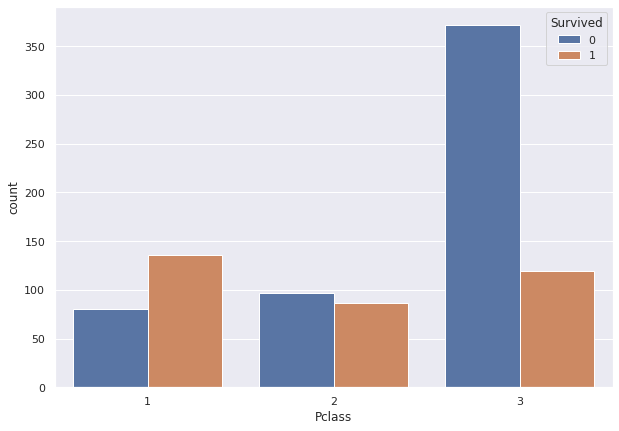

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Pclass', hue = 'Survived', data = titanik )

Судя по графику наибольшее количество погибших пассажиров из 3 класса, получается зависимость есть

**Name** — имя

Этот признак я удалю, так как имя человека навряд-ли влияет на выживаемость.

**Sex** — пол

Данный признак оставим, так он возможно может на виживаемсть ввиду физиологических особенностей и некотрых социальных правил(женщин и детей спасают обычно первыми)

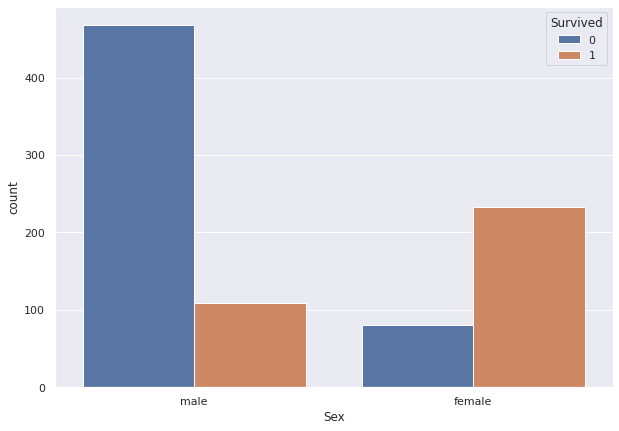

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Sex', hue = 'Survived', data = titanik )

In [ ]:
titanik['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

И график это подтверждает, женщин спаслось больше , даже не смотря на то что на борту было большее количество мужчин 

**Age** — возраст
Этот признак тоже нужно оставить, во-первых, так же из-за социального правила, которое было описано выше , во-вторых, можем предположить что, чем старше человек, тем сложнее ему спастись, так же возможно сложно спастись детям самостоятельно 

Text(0.5, 1.0, 'Распределение выживших пассажиров по возрасту')

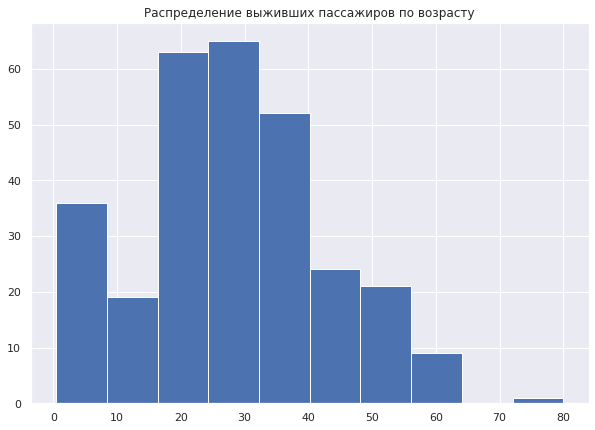

In [ ]:
(titanik.where(titanik['Survived'] == 1)).Age.hist()
plt.title('Распределение выживших пассажиров по возрасту')

Text(0.5, 1.0, 'Распределение умерших пассажиров по возрасту')

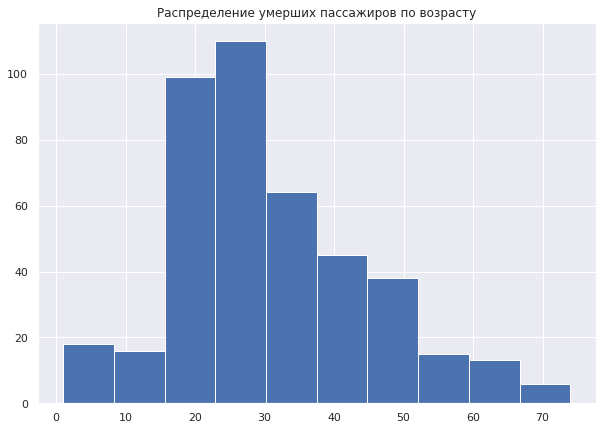

In [ ]:
(titanik.where(titanik['Survived'] == 0)).Age.hist()
plt.title('Распределение умерших пассажиров по возрасту')

Судя по графику можно предположить, что детей спасали , а старость отрицательно влияет на выживание

**SibSp** — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника 

Этот показатель я оставлю, так можно предположить, что чем больше родственников на борту, тем больше вероятность, что тебе помогут

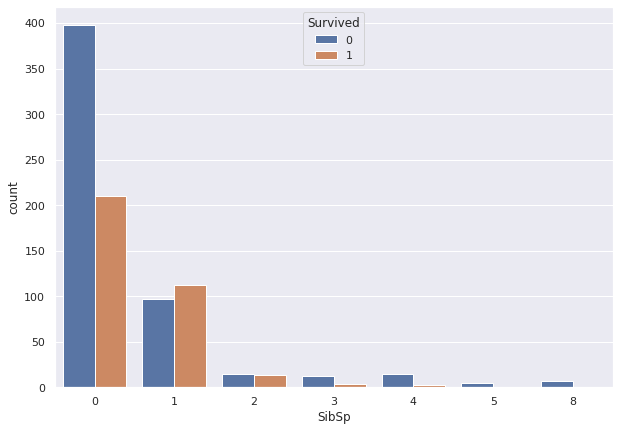

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'SibSp', hue = 'Survived', data = titanik )

Но судя по графику, получилось обратное, выживали в основном пасссажиры без подственников на борту

**Parch** — количество родителей, детей (в том числе приемных) на борту титаника 

Данный признак тоже считаю нужным оставить, по той же причине, что и SibSp

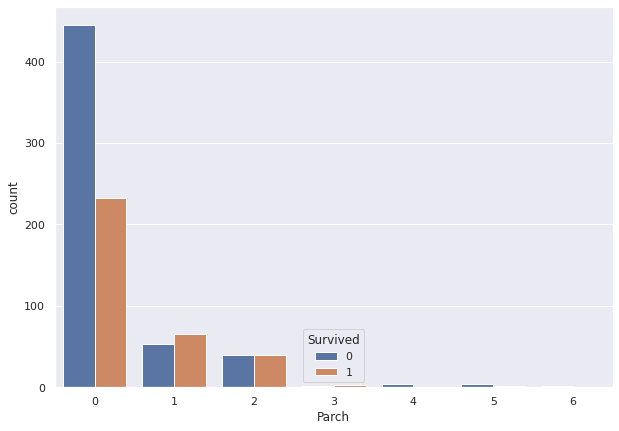

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Parch', hue = 'Survived', data = titanik )

Тоже получается обратная ситуация, так же как и с предыдущим графиком

**Ticket** — номер билета Данный признак я считаю, что можно удалить, так как не считаю что цифры и буквы билета помогут выжить

**Fare** — плата за проезд Данный признак можно оставить, так как возможно отображает благосостояние пассажира, что может влиять на выживаеиость, как мы уже ранее убедились

**Cabin** — каюта Данный признак считаю можно удалить, так как слишком много пропущенных значений

**Embarked** — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон) Данный класс оставим так судя по графику, возможно на выживаемость он каким-то образом влияет

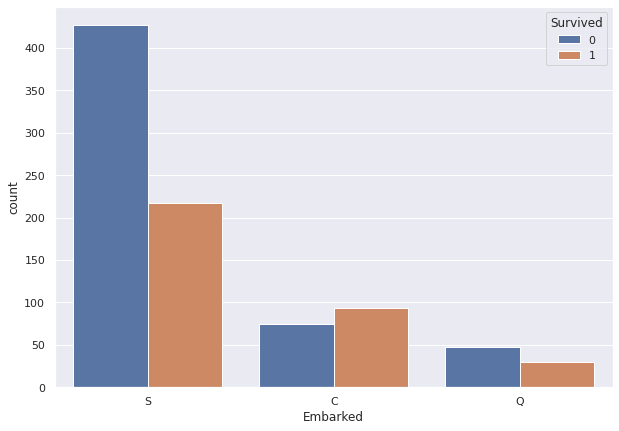

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Embarked', hue = 'Survived', data = titanik )

**PassengerId** - данный признак тоже удаляем, это просто id и на выживаемость он никак влиять не может

Удаляем ненужные нам признаки

In [ ]:
titanik.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanik.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Проверьте данные на наличие пропущенных значений.**

**a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.**

In [ ]:
print(f'Если мы просто удалим строки с пропущенными данными, то мы потеряем приблизительно\
 {int((sum([True for idx,row in titanik.iterrows() if any(row.isnull())])/len(titanik))*100)}% данных')

Если мы просто удалим строки с пропущенными данными, то мы потеряем приблизительно 20% данных


**b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы**

In [ ]:
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


У нас остались остались два признака в которых отсутствуют значения,
это Embarked и Age

Отсутствующие значения в колонке Age заполню медианой с группировкой по полу пассажиров, так считаю что это лучший вариант в данном случае, чтобы не нарушить всю картину данных в целом

Text(0, 0.5, 'Количество')

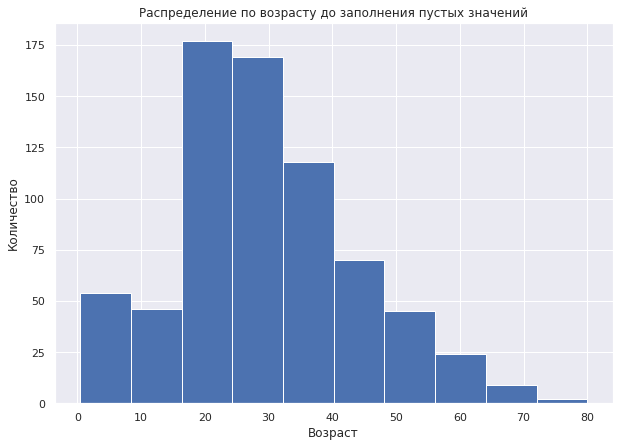

In [ ]:
titanik['Age'].hist()
plt.title('Распределение по возрасту до заполнения пустых значений')
plt.xlabel('Возраст')
plt.ylabel('Количество')

In [ ]:
titanik['Age'] = titanik['Age'].fillna(titanik.groupby('Sex')['Age'].transform('median'))

Text(0, 0.5, 'Количество')

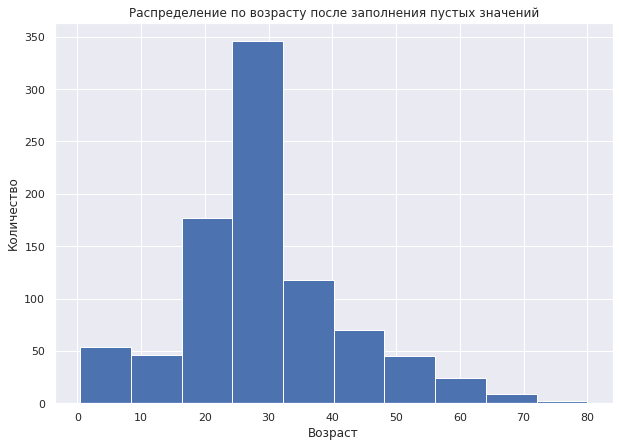

In [ ]:
titanik['Age'].hist()
plt.title('Распределение по возрасту после заполнения пустых значений')
plt.xlabel('Возраст')
plt.ylabel('Количество')

In [ ]:
titanik.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Судя по графику, видно что распределение изменилось, но основные показатели статистики сильно не отличаются

Отсутствующие значения в колонке Embarked заполню модой. У нас только два отсутствующих значения. Можно предпожить что они сели в том же порту, где и основная масса пассажиров, то есть порт S — Саутгемптон

In [ ]:
titanik['Embarked'] = titanik['Embarked'].fillna(titanik['Embarked'].mode()[0])

In [ ]:
titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Все пропущенные значения заполнены

**Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**

У наc имеются два категориальных признака Sex и Embarked

Замненим значения категориального признака Sex, так у нас все лишь два значения и они не являются ранговыми, на числовое с помощью LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
titanik['Sex'] = le.fit_transform(titanik['Sex'])

In [ ]:
titanik.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Значения категориального признака Embarked преобразуем с помощью get_dummies

In [ ]:
dummies = pd.get_dummies(titanik['Embarked'])

In [ ]:
dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
titanik = pd.concat([titanik,dummies], axis = 'columns')

In [ ]:
titanik.drop(['Embarked'], axis='columns',inplace=True)

In [ ]:
titanik.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


**Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**

Построим график корреляций, чтобы проверить , коррелируют наши признаки между собой

In [ ]:
corr = titanik.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.073296,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.338056,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.095256,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.073296,-0.338056,0.095256,1.000000,-0.236376,-0.176038,0.094161,0.030385,-0.032994,-0.005855
SibSp,-0.035322,0.083081,-0.114631,-0.236376,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.176038,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.094161,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,0.168240,-0.243292,-0.082853,0.030385,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.074115,-0.032994,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
S,-0.149683,0.074053,0.119224,-0.005855,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


Судя по матрице корреляций сильной корреляции между признаками нет, кроме портов посадки, что по идее логично , человек купивший билет и севший на корабль в определенном порту, не мог сделать это в другом

**Попробуйте математически преобразовать признак Age**

In [ ]:
titanik['Age^2'] = titanik['Age']**2

In [ ]:
titanik.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Age^2
0,0,3,1,22.0,1,0,7.2500,0,0,1,484.0
1,1,1,0,38.0,1,0,71.2833,1,0,0,1444.0
2,1,3,0,26.0,0,0,7.9250,0,0,1,676.0
3,1,1,0,35.0,1,0,53.1000,0,0,1,1225.0
4,0,3,1,35.0,0,0,8.0500,0,0,1,1225.0


**Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**

In [ ]:
titanik.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S', 'Age^2'],
      dtype='object')

In [ ]:
X2 = titanik[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q','S']]

In [ ]:
y2 = titanik['Survived']

In [ ]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size= 0.2)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X2_train, y2_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict_proba = lr.predict_proba(X2_test)

In [ ]:
predict = lr.predict(X2_test)

Посчитаем метрики

метрика accuracy

In [ ]:
lr.score(X2_train, y2_train)

0.8075842696629213

In [ ]:
lr.score(X2_test, y2_test)

0.770949720670391

метрика precision

In [ ]:
precision_score(y2_test,predict)

0.7333333333333333

метрика recall

In [ ]:
recall_score(y2_test,predict)

0.6376811594202898

**Кратко опишите какие преобразования были сделаны и почему.**

Данный пунк был описан в процессе преобразования данных

**Сравните метрики моделей из п. 2 и п. 10.**

сравнение моделей по метрике accuracy

In [ ]:
print(f'Показатель метрики accuracy до обработки данных  {lr1.score(X_test, y_test)}\n\
        Показатель метрики accuracy после обработки данных   {lr.score(X2_test, y2_test)}')

Показатель метрики accuracy до обработки данных  0.6783216783216783
        Показатель метрики accuracy после обработки данных   0.770949720670391


сравнение моделей по метрике precision

In [ ]:
print(f'Показатель метрики precision до обработки данных  {precision_score(y_test,predict1)}\n\
        Показатель метрики precision после обработки данных   {precision_score(y2_test,predict)}')

Показатель метрики precision до обработки данных  0.625
        Показатель метрики precision после обработки данных   0.7333333333333333


сравнение моделей по метрике recall

In [ ]:
print(f'Показатель метрики recall до обработки данных  {recall_score(y_test,predict1)}\n\
        Показатель метрики recall после обработки данных   {recall_score(y2_test,predict)}')

Показатель метрики recall до обработки данных  0.44642857142857145
        Показатель метрики recall после обработки данных   0.6376811594202898


**Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?**

Судя по резулатам сравнения двух моделей, правильная подготовка и обработка данных, позволяет модели обучаться гораздо лучше. Соответственно к данным этапам нужно относиться ответственно и внимательно, в противном случае мы получим худший результат.

Для очень больших данных считаю что не все данные нужно преобразовывать. Если данных для обучения модели достаточно и она дает хороший результат, то дефектные признаки можно просто не брать для обучения модели.